In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv(r'C:\Users\HP\Desktop\AI_Data_science\Data_sci\Assignmets\clusturing\crime_data.csv')

In [3]:
df.head(10)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


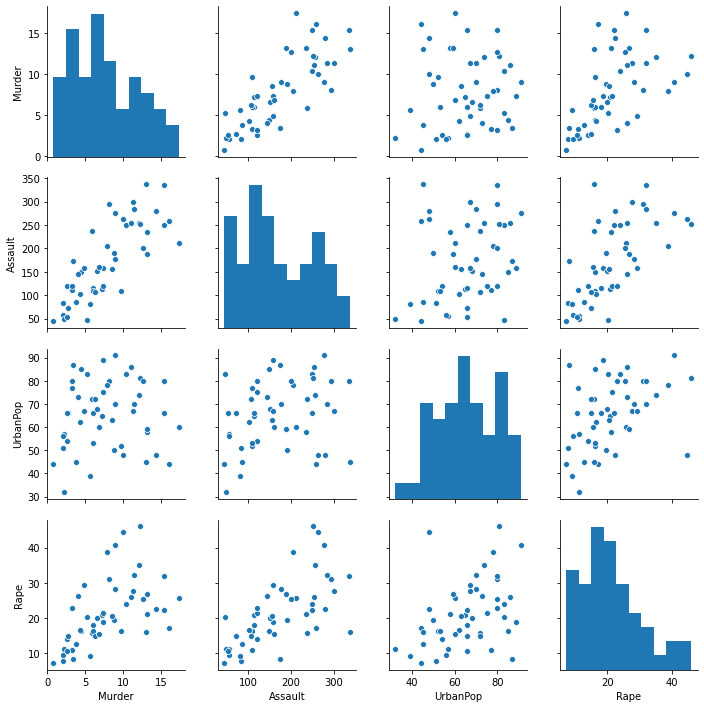

In [5]:
sns.pairplot(df)

In [6]:
df.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

<AxesSubplot:xlabel='Rape'>

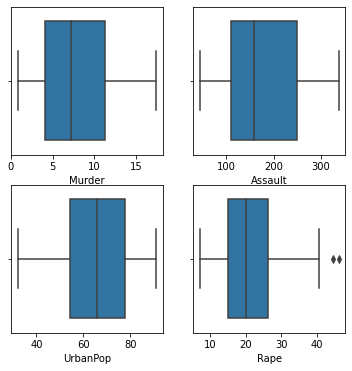

In [7]:
plt.figure(figsize=(6,6))
plt.subplot(221)
sns.boxplot(df.Murder)
plt.subplot(222)
sns.boxplot(df.Assault)
plt.subplot(223)
sns.boxplot(df.UrbanPop)
plt.subplot(224)
sns.boxplot(df.Rape)

In [8]:
df[df.Rape > 41]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
1,Alaska,10.0,263,48,44.5
27,Nevada,12.2,252,81,46.0


In [9]:
df.drop(index=[1,27],axis=0,inplace=True)

<AxesSubplot:xlabel='Rape'>

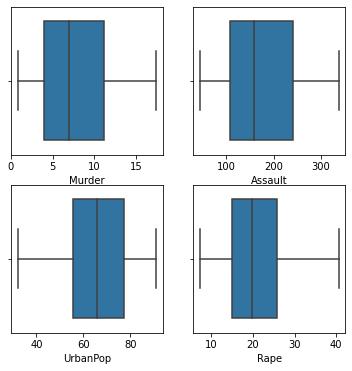

In [10]:
plt.figure(figsize=(6,6))
plt.subplot(221)
sns.boxplot(df.Murder)
plt.subplot(222)
sns.boxplot(df.Assault)
plt.subplot(223)
sns.boxplot(df.UrbanPop)
plt.subplot(224)
sns.boxplot(df.Rape)

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()


In [13]:
array = df.values

In [14]:
df_kmean= df.copy()

In [15]:
df_Dbscan= df.copy()

In [16]:
df_scaled = scaler.fit_transform(array[:,1:])

In [17]:
df_scaled

array([[0.74698795, 0.65410959, 0.44067797, 0.41741742],
       [0.43975904, 0.85273973, 0.81355932, 0.71171171],
       [0.48192771, 0.49657534, 0.30508475, 0.36636637],
       [0.4939759 , 0.79109589, 1.        , 1.        ],
       [0.42771084, 0.54452055, 0.77966102, 0.94294294],
       [0.15060241, 0.22260274, 0.76271186, 0.11411411],
       [0.30722892, 0.6609589 , 0.6779661 , 0.25525526],
       [0.87951807, 0.99315068, 0.81355932, 0.73873874],
       [1.        , 0.56849315, 0.47457627, 0.55555556],
       [0.27108434, 0.00342466, 0.86440678, 0.38738739],
       [0.10843373, 0.25684932, 0.37288136, 0.20720721],
       [0.57831325, 0.69863014, 0.86440678, 0.5015015 ],
       [0.38554217, 0.23287671, 0.55932203, 0.41141141],
       [0.08433735, 0.03767123, 0.42372881, 0.12012012],
       [0.31325301, 0.23972603, 0.57627119, 0.32132132],
       [0.53614458, 0.21917808, 0.33898305, 0.27027027],
       [0.87951807, 0.69863014, 0.57627119, 0.44744745],
       [0.07831325, 0.13013699,

In [18]:
len(df_scaled),len(df)

(48, 48)

In [19]:
# create clusters
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'average')

In [20]:
y_hc = hc.fit_predict(df_scaled)

In [21]:
# save clusters for chart
#y_hc = hc.fit_predict(df_norm)
#Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters= pd.Series(y_hc)

In [22]:
df['clusters'] = Clusters

In [23]:
Clusters

0     2
1     1
2     0
3     1
4     1
5     0
6     0
7     1
8     2
9     0
10    0
11    1
12    0
13    3
14    0
15    0
16    2
17    3
18    1
19    0
20    1
21    0
22    2
23    0
24    0
25    0
26    3
27    0
28    1
29    1
30    2
31    3
32    0
33    0
34    0
35    0
36    0
37    2
38    3
39    2
40    1
41    0
42    3
43    0
44    0
45    3
46    0
47    0
dtype: int64

In [24]:
df.iloc[:,1:].groupby(df.clusters).mean()

,Murder,Assault,UrbanPop,Rape,clusters
clusters,,,,,
0.0,7.652174,164.347826,64.086957,21.534783,0.0
1.0,5.122222,150.888889,65.888889,17.255556,1.0
2.0,10.442857,203.142857,63.714286,21.971429,2.0
3.0,8.942857,178.428571,72.714286,20.042857,3.0


In [25]:
hc.labels_

array([2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 0, 1, 0, 3, 0, 0, 2, 3, 1, 0, 1, 0,
       2, 0, 0, 0, 3, 0, 1, 1, 2, 3, 0, 0, 0, 0, 0, 2, 3, 2, 1, 0, 3, 0,
       0, 3, 0, 0], dtype=int64)

In [26]:
#df.groupby(df.clusters).mean()

# Kmean

In [27]:
from sklearn.cluster import KMeans

In [28]:
# Selecting 5 clusters from the above scree plot which is the optimum number of clusters 
model=KMeans(n_clusters=4) 
model.fit(df_scaled)

model.labels_ # getting the labels of clusters assigned to each row 

array([3, 1, 3, 1, 1, 2, 2, 1, 3, 2, 0, 1, 2, 0, 2, 0, 3, 0, 1, 2, 1, 0,
       3, 1, 0, 0, 0, 2, 1, 1, 3, 0, 2, 2, 2, 2, 2, 3, 0, 3, 1, 2, 0, 2,
       2, 0, 0, 2])

In [29]:
md= pd.Series(model.labels_)

In [30]:
df_kmean['md']=md

In [31]:
df_kmean.iloc[:,1:7].groupby(df_kmean.md).mean()

,Murder,Assault,UrbanPop,Rape,md
md,,,,,
0.0,8.076923,161.307692,71.384615,21.876923,0.0
1.0,6.220000,161.700000,63.700000,17.240000,1.0
2.0,7.293333,158.600000,62.066667,20.206667,2.0
3.0,10.150000,214.500000,65.750000,23.100000,3.0


# DBSCAN

In [32]:
from sklearn.cluster import DBSCAN

In [39]:
dbscan = DBSCAN(eps=3, min_samples=6)
dbscan.fit(df_scaled)

DBSCAN(eps=3, min_samples=6)

In [40]:
dbscan.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [41]:
dbs = pd.Series(dbscan.labels_)

In [42]:
df_Dbscan['DBSCAN']= dbs

In [43]:
df_Dbscan

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,DBSCAN
0,Alabama,13.2,236,58,21.2,0.0
2,Arizona,8.1,294,80,31.0,0.0
3,Arkansas,8.8,190,50,19.5,0.0
4,California,9.0,276,91,40.6,0.0
5,Colorado,7.9,204,78,38.7,0.0
6,Connecticut,3.3,110,77,11.1,0.0
7,Delaware,5.9,238,72,15.8,0.0
8,Florida,15.4,335,80,31.9,0.0
9,Georgia,17.4,211,60,25.8,0.0
10,Hawaii,5.3,46,83,20.2,0.0
